<a href="https://colab.research.google.com/github/Pushpit07/K-Means-Clustering-and-Recommendations-System/blob/main/recom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

In [2]:
rating = pd.read_csv('./rating.csv')

In [3]:
rating.head()

,Unnamed: 0,user_id,anime_id,rating
0,2443027,23306,3503.0,7.0
1,4751250,45366,1190.0,-1.0
2,7694962,72305,5150.0,8.0
3,7066179,65975,6045.0,10.0
4,7198178,67151,3702.0,9.0


In [6]:
anime = pd.read_csv('./anime.csv')

In [7]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [8]:
items = np.array(anime.genre)

In [9]:
items

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai', 'Hentai', 'Hentai'], dtype=object)

In [10]:
vals = [("Drama" in str(item)) for item in items]

In [15]:
anime.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [16]:
X = anime.loc[vals]

In [17]:
X_mod = X[['episodes', 'rating', 'members']]

In [18]:
X_mod

,episodes,rating,members
0,1,9.37,200630
1,64,9.26,793665
5,10,9.15,93351
7,110,9.11,80679
10,24,9.06,456749
...,...,...,...
12017,1,5.72,4981
12071,3,5.61,654
12143,1,5.46,841
12203,2,5.23,4550


In [20]:
X_mod.describe()

,rating,members
count,1977.000000,2016.000000
mean,6.977218,28900.097718
std,0.881088,71701.646529
min,3.330000,20.000000
25%,6.420000,443.750000
50%,7.020000,4079.000000
75%,7.560000,22722.500000
max,9.370000,896229.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


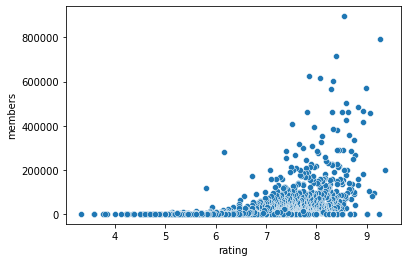

In [21]:
sns.scatterplot(X_mod.rating, X_mod.members)